In [1]:
%matplotlib inline

from scipy.stats import beta as beta_dst
from scipy.special import beta as beta_fnc
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np

The goal of this project is to study how bayesian inference can be used to determine the posterior probability of a Bernoulli variable with an unknown parameter $p$, the probability that the Bernoulli random variable is a success. The prior probability is a continuous Probability Density Function over the domain $[0,1]$, representing the prior confidence on the value of the parameter $p$. It is implemented as a Beta Function, due to both the high flexibility conferred by its parameters $\alpha$ and $\beta$ and to the easiness of calculating the posterior PDF after $n$ trials with $s\leq n$ success have been observed. 

Given that the prior probability is a Beta RV ~ $(\alpha, \beta)$, after $n$ trials with $s$ successes, the posterior probability will be

$$\text{posterior probability} (x=p | n, s, \alpha_{\text{prior}},\beta_{\text{prior}}) = \frac{x^{s + \alpha_{\text{prior}} - 1}(1-x)^{n - s + \beta_{\text{prior}} - 1}}{\text{Beta}(s+\alpha_{\text{prior}}, n-s + \beta_{\text{prior}})}, $$

as described in https://en.wikipedia.org/wiki/Beta_distribution#Effect_of_different_prior_probability_choices_on_the_posterior_beta_distribution
. 

The original motivation for this quick project was to estimate the defect rate of a large lot of TVs that had been recently acquired, after $n$ TVs were tested with $s$ defects. The main unknown is the prior PDF, so it is interesting to see how the posterior changes for different priors. In this context, a TV defect is modelled as a Bernoulli RV with probability 'p' of occurrying.

There are many different ways of initializing the prior PDFs. A discussion about three common possible priors, namely the Bayes prior (the uniform distribution, Beta(1,1)), the Haldane's prior (Beta(0,0)) and the Jeffrey's prior (Beta(1/2,1/2)), with the rationale behind each prior, can be found at https://en.wikipedia.org/wiki/Beta_distribution#Bayesian_inference. We will test all those priors, with the addition of a fourth prior, based on some previous knowledge on this specific type of problem.


In [42]:
#Posterior beta distribution as described in:
#https://en.wikipedia.org/wiki/Beta_distribution#Effect_of_different_prior_probability_choices_on_the_posterior_beta_distribution

def posterior_beta(x, alpha_prior, beta_prior, n, s):
    #n trials, s successes
    x = np.array(x)
    return np.divide(np.multiply(np.power(x, s+alpha_prior-1),np.power(1-x,n-s+beta_prior-1)),beta_fnc(s+alpha_prior, n-s+beta_prior))

def plot_posterior(alpha_prior, beta_prior, n, s, x_points = 100):
    #plots the prior and posterior PDFs, after observing n trials with s successes
    x = np.linspace(0,1, x_points)
    prior = beta_dst.pdf(x, a=alpha_prior, b=beta_prior)
    y = posterior_beta(x, alpha_prior, beta_prior, n, s)
    plot = plt.plot(x,prior,x,y)
    prior_mean = beta_dst.mean(alpha_prior, beta_prior)
    prior_var = beta_dst.var(alpha_prior, beta_prior)
    posterior_mean = quad(lambda x: np.multiply(x,posterior_beta(x, alpha_prior, beta_prior, n, s)),a=0, b=1)
    posterior_mean = posterior_mean[0]
    posterior_var = quad(lambda x: np.multiply(np.power(x,2),posterior_beta(x, alpha_prior, beta_prior, n, s)),a=0, b=1)
    posterior_var = posterior_var[0]-posterior_mean**2
    print('prior mean = %.2f%%' % (100*prior_mean))
    print('posterior mean = %.2f%%' % (100*posterior_mean))
    print('prior var = %.8f' % (prior_var))
    print('posterior var = %f' % (posterior_var))
    print('posterior var / prior var = %f' % (posterior_var/prior_var))

In [89]:
#After 100 tries, 2 of the TVs had a defect
n = 100
s = 2

prior mean = 50.00%
posterior mean = 2.94%
prior var = 0.08333333
posterior var = 0.000277
posterior var / prior var = 0.003326


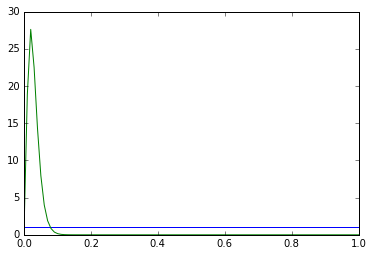

In [90]:
#Uniform prior, Beta(1,0)
plot_posterior(1,1,n,s)

prior mean = nan%
posterior mean = 2.00%
prior var = nan
posterior var = 0.000194
posterior var / prior var = nan


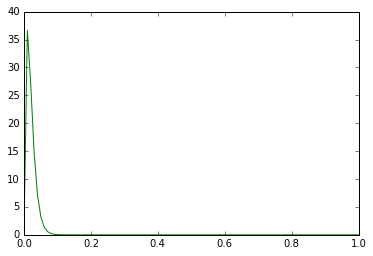

In [91]:
#Haldane's prior, Beta(0,0)
plot_posterior(0,0,n,s)

prior mean = 50.00%
posterior mean = 2.48%
prior var = 0.12500000
posterior var = 0.000237
posterior var / prior var = 0.001893


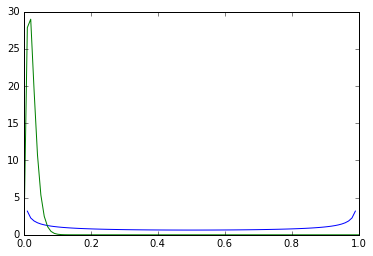

In [92]:
#Jeffrey's prior, Beta(1/2,1/2)
plot_posterior(0.5,0.5,n,s)

prior mean = 5.00%
posterior mean = 2.50%
prior var = 0.00226190
posterior var = 0.000201
posterior var / prior var = 0.089060


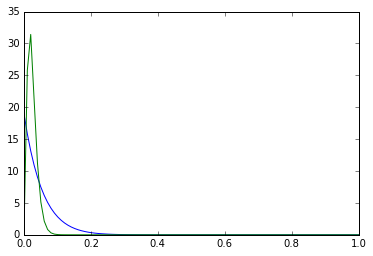

In [94]:
#Informed prior, Beta(1,19)
#This prior assumes that the failure rate of a brand new televisor should be low. The expected value of a Beta function is
#alpha/(alpha+beta), so the parameters alpha = 1, beta = 19 will give a mean failure rate of 5%
plot_posterior(1,19,n,s)

With $100$ tries, all priors led to a very similar posterior distribution, with a mean that ranged from $2$% to $2.94$%. We are highly confident that the defect rate is below 10%, and from the error detected we know it cannot be 0%. We cannot, however, say confidently that the error is 2%, as a purely frequentist analysis would suggest. Next cell shows how the posterior PDF gets more and more concentrated with more evidence. 

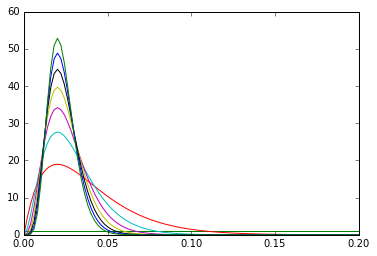

In [102]:
#Some fun with beta functions
x = np.linspace(0,1, 500)
alpha_prior = 1
beta_prior = 1
s=0
prior = beta_dst.pdf(x, a=alpha_prior, b=beta_prior)
plt.plot(x,prior)
for s in range(8):
    y = posterior_beta(x, alpha_prior, beta_prior, 50*s, s)
    plt.plot(x,y)
plt.axis([0,0.2,0,60])
plt.show()